In [1]:
from scipy import signal
import numpy as np
from typing import Optional
import matplotlib.pyplot as plt
import mne

In [6]:
X = np.random.random((5, 10))

In [3]:
output = 'patterns old'


True

In [10]:
X@X.T

array([[2.15045989, 2.30074299, 2.19958164, 2.54149204, 1.88222181],
       [2.30074299, 4.20837708, 3.54434538, 3.61506717, 3.12888298],
       [2.19958164, 3.54434538, 3.35426953, 3.2921137 , 2.49424876],
       [2.54149204, 3.61506717, 3.2921137 , 3.84318316, 2.9737863 ],
       [1.88222181, 3.12888298, 2.49424876, 2.9737863 , 3.01407439]])

In [241]:
def compute_morlet_cwt(sig: np.ndarray, t: np.ndarray, freqs: np.ndarray, omega_0: Optional[float] = 5, phase: Optional[bool] = False) -> np.ndarray:
    dt = t[1] - t[0]
    widths = omega_0 / (2 * np.pi * freqs * dt)
    morlet = lambda M, s: signal.morlet2(M, s, w=omega_0)
    cwtmatr = signal.cwt(sig, morlet, widths)
    if phase:
        return cwtmatr
    else:
        return np.real(cwtmatr)**2 + np.imag(cwtmatr)**2

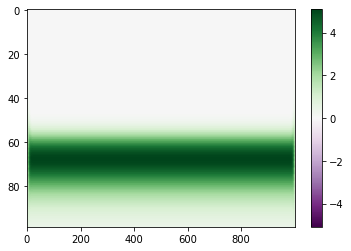

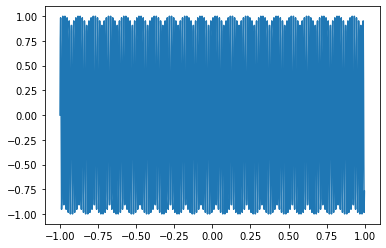

In [253]:
t = np.linspace(-1, 1, 1000, endpoint=False)

# sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
# sig = np.sin( 10*2*np.pi* t) + np.sin( 30*2*np.pi* t) + np.sin( 50*2*np.pi* t)
sig = np.sin( 70*2*np.pi* t)
# sig = np.sin( 30*2*np.pi* t) + np.sin( 29*2*np.pi* t)

freqs = np.arange(1, 100)

cwtmatr = compute_morlet_cwt(sig, t, freqs)

plt.imshow(
    cwtmatr,
    cmap='PRGn', aspect='auto',
    vmax=abs(cwtmatr).max(),
    vmin=-abs(cwtmatr).max()
)
plt.colorbar()

plt.show()

plt.plot(t, sig)
plt.show()

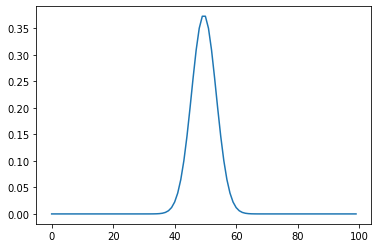

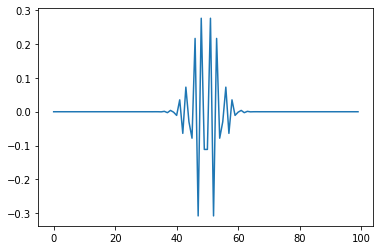

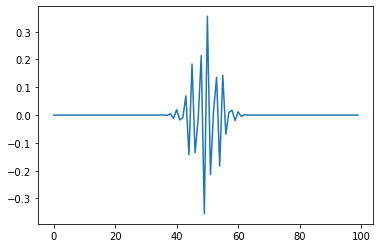

In [231]:
M = 100

s = 4.0

omega_0 = 15.0

wavelet = signal.morlet2(M, s, omega_0)


plt.plot(np.abs(wavelet))

plt.show()

plt.plot(np.real(wavelet))

plt.show()

plt.plot(np.imag(wavelet))

plt.show()


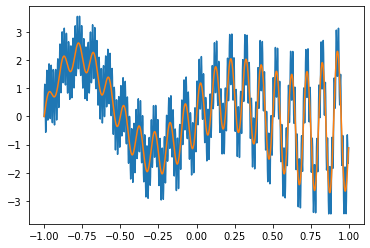

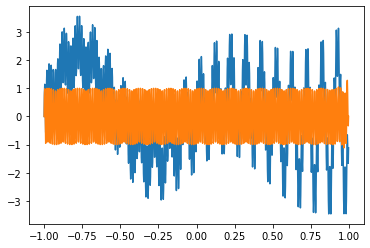

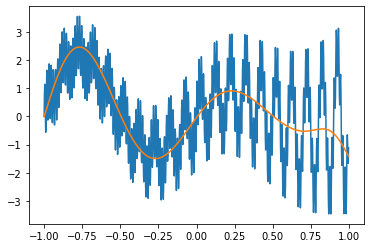

In [107]:

from scipy.signal import firwin, lfilter, filtfilt

def lowpass_filter(cutoff, fs, n_taps=255):

    return firwin(n_taps, cutoff, pass_zero='lowpass', nyq=fs//2)

def highpass_filter(cutoff, fs, n_taps=255):

    return firwin(n_taps, cutoff, pass_zero='highpass', nyq=fs//2)

def bandpass_filter(lf, hf, fs, n_taps=255):

    return firwin(n_taps, [lf, hf], pass_zero='bandpass', nyq=fs//2)

sig = np.sin( 70*2*np.pi* t) + np.sin( 10*2*np.pi* t)*np.exp(t) + np.sin( 1*2*np.pi* t)*1/np.exp(t)
plt.plot(t, sig)
filter_coefs = lowpass_filter(15, 500)
filtered_sig = filtfilt(filter_coefs, 1, sig, axis=0)
plt.plot(t, filtered_sig)
plt.show()

sig = np.sin( 70*2*np.pi* t) + np.sin( 10*2*np.pi* t)*np.exp(t) + np.sin( 1*2*np.pi* t)*1/np.exp(t)
plt.plot(t, sig)
filter_coefs = highpass_filter(15, 500)
filtered_sig = filtfilt(filter_coefs, 1, sig, axis=0)
plt.plot(t, filtered_sig)
plt.show()

plt.plot(t, sig)
filter_coefs = bandpass_filter(1, 2, 500)
filtered_sig = filtfilt(filter_coefs, 1, sig, axis=0)
plt.plot(t, filtered_sig)
plt.show()

In [10]:
from scipy import signal

taps = signal.firwin2(150, [0.0, 0.5, 1.0], [1.0, 1.0, 0.0])

print(taps[72:78])

[-0.02286961 -0.06362756  0.57310236  0.57310236 -0.06362756 -0.02286961]
